# **Context**

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

There two datasets Respectively one Consists of Tweets from Twitter with Sentimental Label and the other from Reddit which Consists of Comments with its Sentimental Label.

1. Twitter Dataset
2. Reddit Dataset

All these Tweets and Comments were extracted using there Respective Apis Tweepy and PRAW.


**0 Indicating it is a Neutral Tweet/Comment**

**1 Indicating a Postive Sentiment** 

**-1 Indicating a Negative Tweet/Comment**

In [ ]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import tensorflow as tf
tensorflow=2.5
from tensorflow import keras
from keras.layers import Dense,Flatten,LSTM,Embedding,Dropout
from keras.layers.experimental.preprocessing import TextVectorization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#reading data
re_df=pd.read_csv("Reddit_Data.csv",nrows=1000)
tw_df=pd.read_csv("Twitter_Data.csv",nrows=1000)

In [ ]:
#knowing the data
print(f"Top 5 records :\n\n {re_df.head()} \n\n\n\n ")
print(f"Information of columns : {re_df.info()}\n\n\n\n")


Top 5 records :

                                        clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1 



 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  998 non-null    object
 1   category       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
Information of columns : None






In [ ]:
#checking for nan values and duplicated values in table
print(f"Number of nan values:\n\n{re_df.isna().sum()}\n\n")
print(f"Duplicated Values: \n\n {re_df.duplicated(subset=['clean_comment'],keep='first').value_counts()}")

Number of nan values:

clean_comment    2
category         0
dtype: int64


Duplicated Values: 

 False    995
True       5
dtype: int64


In [ ]:
#dropping the duplicated and  nan rows
re_df.dropna(inplace=True)
re_df.drop_duplicates(subset=["clean_comment"],inplace=True)
#checking
re_df.isna().sum()
re_df.duplicated(subset=['clean_comment'],keep='first').value_counts()

False    994
dtype: int64

Count of records in different categories:

  1    495
 0    293
-1    206
Name: category, dtype: int64




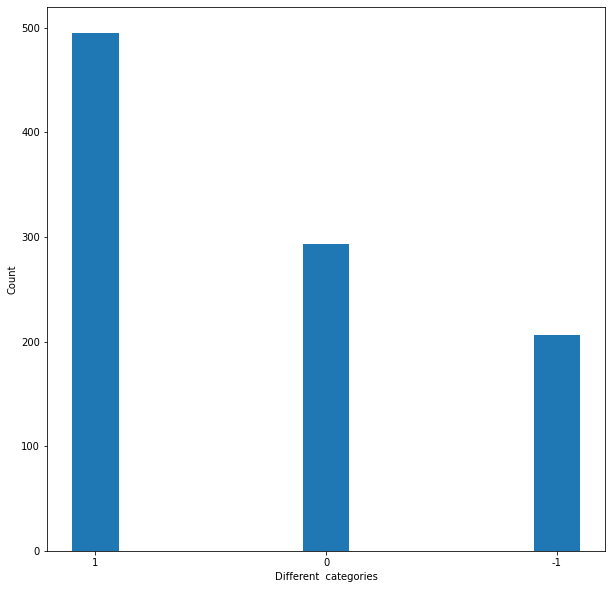

In [ ]:
print(f"Count of records in different categories:\n\n {re_df['category'].value_counts()}\n\n")

#seeing the dataset is balanced or not
y_values=[value for value in re_df["category"].value_counts()]
x_label=[str(value) for value in re_df["category"].value_counts().index]
x_values=[i for i in range(3)]
#x_label.insert(0,0)
plt.figure(figsize=(10,10))
plt.bar(x_values,y_values,0.2)
plt.xticks(ticks=[0,1,2],labels=x_label)
plt.xlabel("Different  categories")
plt.ylabel("Count")
plt.show()

The dataset seems to be disbalanced 

To tackle this we can use over sampling or under sampling. As our data is not huge data we would use over sampling

Our evaluation matrix can be F1 score.



In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x=re_df["clean_comment"].values.reshape(-1,1)
y=re_df["category"].values.reshape(-1,1)
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Original dataset shape (994, 1)
Resample dataset shape (1485,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_ros.shape,y_ros.shape)
x_ros=x_ros.reshape(-1,)
y_ros=y_ros.reshape(-1,)
#-1 meaning
#It simply means that it is an unknown dimension and we want numpy to figure it out.

df_reddit=pd.DataFrame(data=list(zip(x_ros,y_ros)),columns=["comment","category"])
df_reddit

(1485, 1) (1485,)


,comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
1480,because arvind kejriwal reminds robespierre,0
1481,what the total cost for this battlestation,0
1482,any specific reason you went with acrylic tubi...,0
1483,aurum mom,0


In [ ]:
df_reddit.columns

Index(['comment', 'category'], dtype='object')

In [ ]:
df_reddit["category"].value_counts()

 0    495
 1    495
-1    495
Name: category, dtype: int64

Top 5 records :

                                           clean_text  category
0  when modi promised “minimum government maximum...        -1
1  talk all the nonsense and continue all the dra...         0
2  what did just say vote for modi  welcome bjp t...         1
3  asking his supporters prefix chowkidar their n...         1
4  answer who among these the most powerful world...         1 



 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  999 non-null    object
 1   category    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
Information of columns : None




Number of nan values:

clean_text    1
category      0
dtype: int64


Duplicated Values: 

 False    1000
dtype: int64
Count of records in different categories:

  1    441
 0    333
-1    225
Name: category, dtype: int64




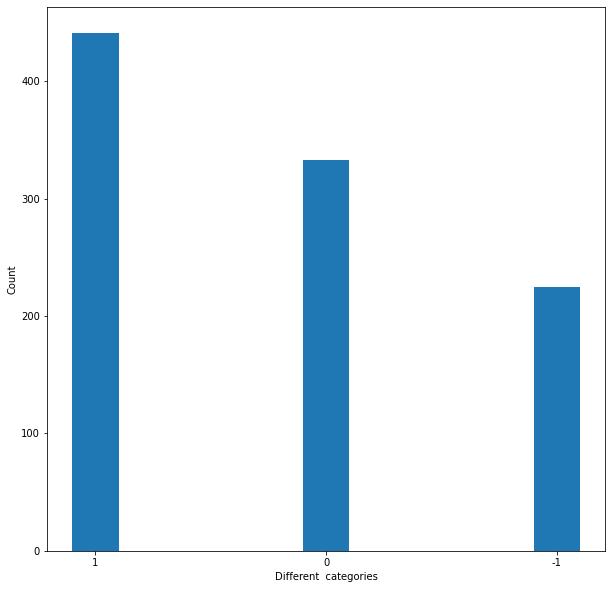

In [ ]:
#knowing the data
print(f"Top 5 records :\n\n {tw_df.head()} \n\n\n\n ")
print(f"Information of columns : {tw_df.info()}\n\n\n\n")


#checking for nan values and duplicated values in table
print(f"Number of nan values:\n\n{tw_df.isna().sum()}\n\n")
print(f"Duplicated Values: \n\n {tw_df.duplicated(subset=['clean_text'],keep='first').value_counts()}")


#dropping the duplicated and  nan rows
tw_df.dropna(inplace=True)
tw_df.drop_duplicates(subset=["clean_text"],inplace=True)
#checking
tw_df.isna().sum()
tw_df.duplicated(subset=['clean_text'],keep='first').value_counts()


print(f"Count of records in different categories:\n\n {tw_df['category'].value_counts()}\n\n")

#seeing the dataset is balanced or not
y_values=[value for value in tw_df["category"].value_counts()]
x_label=[str(value) for value in tw_df["category"].value_counts().index]
x_values=[i for i in range(3)]
#x_label.insert(0,0)
plt.figure(figsize=(10,10))
plt.bar(x_values,y_values,0.2)
plt.xticks(ticks=[0,1,2],labels=x_label)
plt.xlabel("Different  categories")
plt.ylabel("Count")
plt.show()



In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x=re_df["clean_comment"].values.reshape(-1,1)
y=re_df["category"].values.reshape(-1,1)
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_ros.shape)


print(x_ros.shape,y_ros.shape)
x_ros=x_ros.reshape(-1,)
y_ros=y_ros.reshape(-1,)
#-1 meaning
#It simply means that it is an unknown dimension and we want numpy to figure it out.

df_twitter=pd.DataFrame(data=list(zip(x_ros,y_ros)),columns=["comment","category"])
df_twitter["category"].value_counts()

Original dataset shape (994, 1)
Resample dataset shape (1485,)
(1485, 1) (1485,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


 0    495
 1    495
-1    495
Name: category, dtype: int64

The dataset is balanced now


In [ ]:
#merging the 2 data set 
df=pd.concat([df_reddit,df_twitter],axis=0)
df.shape

(2970, 2)

In [ ]:
#lower the data
df["comment"]=df["comment"].apply(lambda x: x.lower())
#Cleaning the data
df["comment"]=df["comment"].apply(lambda x: re.sub("[^a-zA-Z0-9\s]","",x))
df.head(10)

,comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


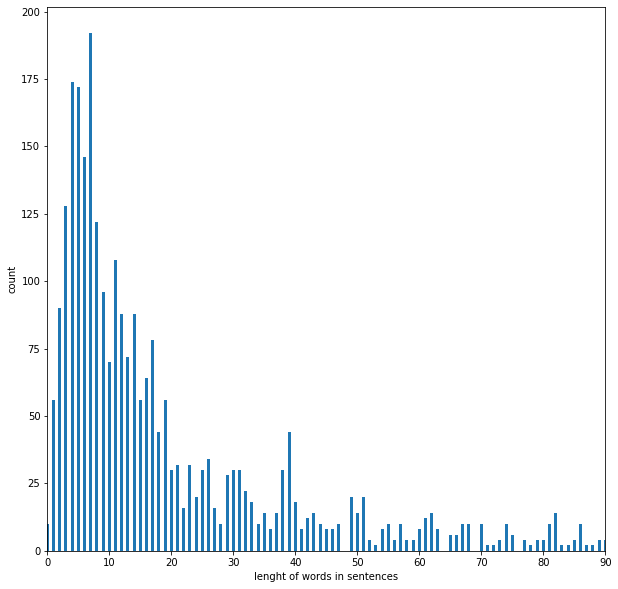

In [ ]:
plt.figure(figsize=(10,10))
word_count=df['comment'].apply(lambda x:len(x.split()))
y=word_count.value_counts()
x=y.index
plt.bar(x,y,width=0.5)
plt.xlim(0,90)
plt.xlabel('lenght of words in sentences')
plt.ylabel('count')
plt.show()

In [ ]:
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
#preparing data for model

tokenizer = Tokenizer(num_words=None,split=" ") #text ----> sequence of integer
tokenizer.fit_on_texts(df["comment"].values)

x=tokenizer.texts_to_sequences(df['comment'].values)
x=pad_sequences(x)

In [ ]:
#dictionary of our words in dataset
tokenizer.word_docs

defaultdict(int,
            {'kind': 46,
             'nonetheless': 2,
             'time': 132,
             'they': 432,
             'developed': 10,
             'equanimity': 2,
             'for': 708,
             'calmness': 2,
             'come': 126,
             'them': 182,
             'puzzled': 2,
             'like': 344,
             'things': 106,
             'tried': 32,
             'admire': 2,
             'all': 314,
             'still': 94,
             'acceptance': 2,
             'never': 82,
             'strange': 2,
             'some': 228,
             'mormon': 2,
             'creature': 2,
             'teaches': 2,
             'explain': 12,
             'patience': 4,
             'and': 970,
             'the': 1370,
             'stare': 2,
             'from': 398,
             'buddhism': 28,
             'family': 24,
             'have': 488,
             'compassion': 4,
             'replied': 2,
             'because': 158,
          

In [ ]:
x.shape

(2970, 455)

In [ ]:
#creating model
from keras.models import Sequential
model=Sequential()
# Embed a 10000 word vocabulary into 256 dimensions.
model.add(Embedding(10000,256,input_length=x.shape[1]))   #sequence of integer to dense vector
#model.add(Dropout(0.3)) #for regularization
model.add(LSTM(256,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3,recurrent_dropout=0.2))

model.add(Dense(1,activation='softmax'))

In [ ]:
#performance measure
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 455, 256)          2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 455, 256)          525312    
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 3,610,881
Trainable params: 3,610,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
y=df['category']
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2)
ytrain=np.asarray(ytrain).astype('int').reshape((-1,1))
ytest=np.asarray(ytest).astype('int').reshape((-1,1))

In [ ]:
batch_size=32
epochs=1

model.fit(x=xtrain,y=ytrain,epochs=epochs,batch_size=batch_size, verbose=2)

75/75 - 622s - loss: -5.7604e-02 - accuracy: 0.3333


In [ ]:
len(ytrain)

2376

In [ ]:
len(model.predict_on_batch(xtest[:33]))

33

In [ ]:
asas=model.predict(x[1])
asas

In [ ]:
len(xy)

In [ ]:
model.save('/tmp/abuse_detection_model.h5')

In [ ]:
results = model.evaluate(xtest, ytest, batch_size=32)
print("test loss, test acc:", results)

In [ ]:
import pickle as pkl
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(x, y)

nb.score(x, y)


y_pred = nb.predict()

with open('abuse_detection', 'wb') as file:
    pickle.dump(model,file)